In [ ]:
# Titanic dataset and Spam versus Ham. We spend some more time coding classification algorithms and gaining experience
# handling data. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import models

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


In [3]:
# Read the downloaded datasets from Kaggle.
train_data = pd.read_csv('Desktop/Coding/Machine_Learning_Geron/titanic_train.csv')
test_data = pd.read_csv('Desktop/Coding/Machine_Learning_Geron/titanic_test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info() # We will use this to ignore the ones with mostly null values such as Cabin

In [289]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data["Survived"].value_counts() # output dataset in terms of survivors. 

In [383]:
# Dropping the empty and NAN datasets
#train_data = train_data.drop(['Ticket','Cabin'], axis=1)
#test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
# Remove NaN values
#train_data = train_data.dropna() 

In [ ]:
train_data.describe() ## Ticket and Cabin removed. 

In [ ]:
train_data.hist(bins = 50, figsize = (20, 15))

In [ ]:
# Make scatter plots of survivors by Age, Fare, and Gender. 

train_data.plot(kind = "scatter", x = "Age", y="Survived")
train_data.plot(kind = "scatter", x = "Age", y="Fare")
train_data.plot(kind = "scatter", x = "Fare", y = "Survived")

In [292]:
# Gender based survival statistics
train_data.Survived[train_data.Sex == 'male'].value_counts() # 109 male survivors
train_data.Survived[train_data.Sex == 'female'].value_counts() #233 female survivors

1    233
0     81
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122999c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122da9fd0>]], dtype=object)

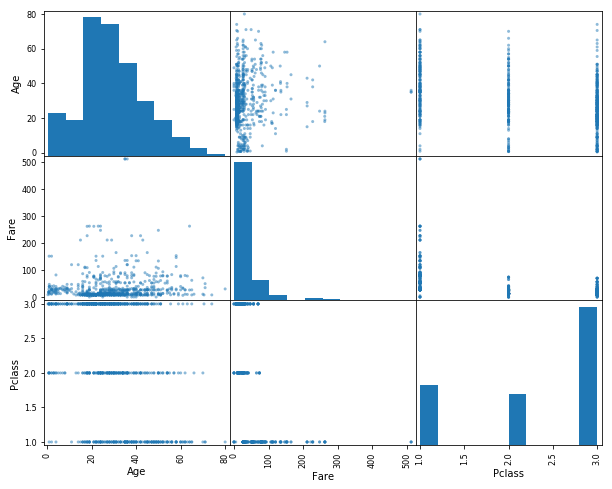

In [291]:
# Finally we try scatter matrix plots of the data to extract correlations between the categories.

from pandas.plotting import scatter_matrix

attributes = ["Age", "Fare", "Pclass", "Sex"]
scatter_matrix(train_data[attributes], figsize = (10, 8))


In [6]:
# Dealing with the Embarked Category. We need to convert the data into numbers, and use LabelEncoder to do so.
from sklearn.preprocessing import LabelBinarizer
encoder = LabelEncoder()
binaryencoder = LabelBinarizer()
train_data_cat = train_data["Embarked"]
train_data_cat = train_data_cat.fillna('S') #fill the dataset with the most common value
train_data_cat_encoded = encoder.fit_transform(train_data_cat) #convert to one-hot encoding. 
train_data_cat_encoded = binaryencoder.fit_transform(train_data_cat_encoded)

In [7]:
train_data_cat_encoded

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ..., 
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [ ]:
train_data.head()

In [8]:
# Select DataFrame as Numerical or Categorical
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [9]:
#Pipeline for numerical attributes. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
        ("scaling", StandardScaler()),
])

In [10]:
num_pipeline.fit_transform(train_data)

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ..., 
       [-0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [11]:
# Categorial Pipeline -- We use a different imputer which replaces the dataset with the most frequent value as we did
#above

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)


In [12]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ('imputer', MostFrequentImputer()),
        ('label_binarizer', encoder),
        #('scaling', StandardScaler())
        ])

In [13]:
catdata_train = cat_pipeline.fit_transform(train_data)
#train_data["Embarked"] = binaryencoder.fit_transform(catdata_train["Embarked"])
#train_data["Pclass"] = binaryencoder.fit_transform(catdata_train["Pclass"])
#train_data["Sex"] = binaryencoder.fit_transform(catdata_train["Sex"])

TypeError: '>' not supported between instances of 'str' and 'int'

In [14]:
# Combining Categorical and Numerical Pipelines. 

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        ])

In [15]:
X_train = preprocess_pipeline.fit_transform(train_data)
y_train = train_data["Survived"]

TypeError: '>' not supported between instances of 'str' and 'int'

In [343]:
#Classifiers

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [16]:
#X_test = preprocess_pipeline.fit_transform(test_data)
#y_test = svc_clf.predict(X_test)
score = cross_val_score(svm_clf, X_train, y_train, cv=10)
score

scoretree = cross_val_score(dec_tree, X_train, y_train, cv=10)
scoretree

scoreforest = cross_val_score(forest, X_train, y_train, cv=10)
scoreforest.mean()

scorelogreg = cross_val_score(log_reg, X_train, y_train, cv=10)
scorelogreg
#scorelogreg.std()

NameError: name 'svm_clf' is not defined

In [ ]:
# Look at the Logistic Regression Model in more detail. Can we fine tune?

log_reg = LogisticRegression(warm_start = True, penalty = "l1", max_iter = 200)
log_reg.fit(X_train, y_train)

In [ ]:
scorelogreg = cross_val_score(log_reg, X_train, y_train, cv=10)
scorelogreg

In [366]:
# Use GridSearch to search hyperparameters in RandomForest 

from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 16, random_state = 42)
forest.fit(X_train, y_train)

scoreforest = cross_val_score(forest, X_train, y_train, cv=10)
scoreforest.mean()

#forest.fit(X_train, y_train)

0.81483997276132114

In [363]:
param_grid = {'n_estimators': [3, 10, 20, 50], 'max_features': [1, 2, 3, 4, 5, 6, 7]}

grid_search = GridSearchCV(forest, param_grid, refit = True, cv=10, verbose = 1)#, scoring = 'neg_mean_squared_error')

grid_search.estimator

grid_search

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 10, 20], 'max_features': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [347]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest, X_train, y_train, cv=10)

In [348]:
confusion_matrix(y_train, y_train_pred)

array([[470,  79],
       [105, 237]])

In [381]:
X_test = preprocess_pipeline.transform(test_data)

TypeError: '>' not supported between instances of 'str' and 'int'

In [371]:

atribs = ["Age", "SibSp", "Parch", "Fare", "Pclass", "Sex", "Embarked"]
for name, score in zip(atribs, forest.feature_importances_):
    print(name, score)

Age 0.113551754134
SibSp 0.0630593540848
Parch 0.0373700635938
Fare 0.177433455686
Pclass 0.0932133229518
Sex 0.489819368725
Embarked 0.0255526808243


In [370]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,3,1,0,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0
4,5,0,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0


In [378]:
test_data["Survived"].value_counts()

KeyError: 'Survived'

In [375]:
y_test

NameError: name 'y_test' is not defined